In [1]:
# @title Default title text
# 3. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Shape: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Logistic Regression Results:
Accuracy: 0.7951
              precision    recall  f1-score   support

           0       0.85   

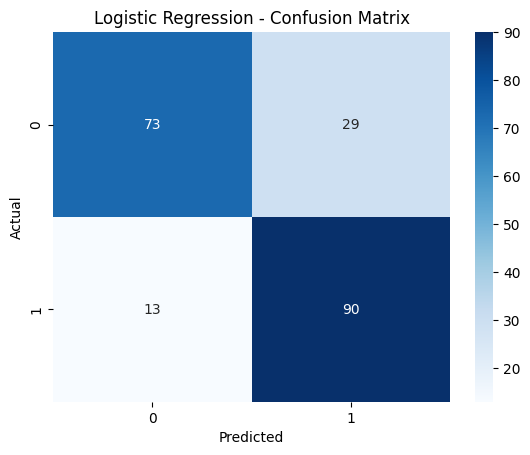


SVM Results:
Accuracy: 0.8146
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       102
           1       0.76      0.92      0.83       103

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



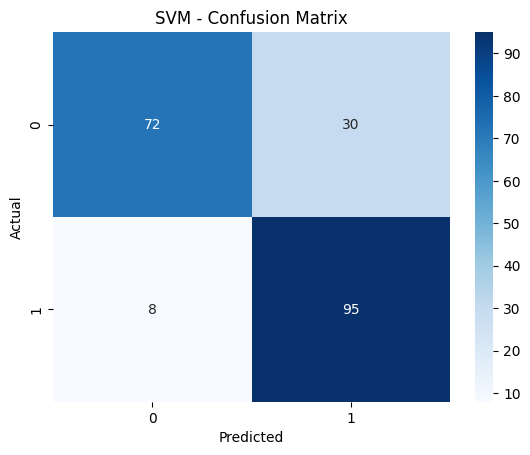


Random Forest Results:
Accuracy: 0.9854
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



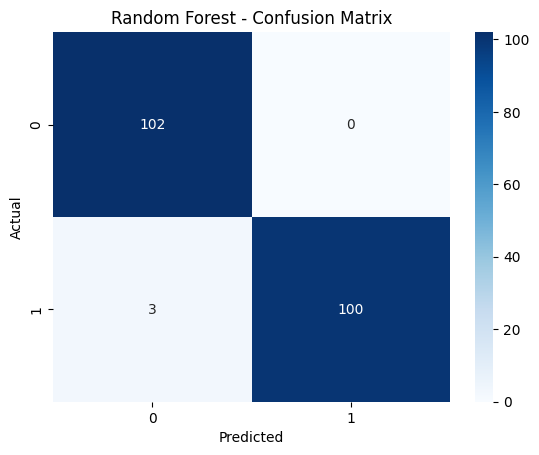


XGBoost Results:
Accuracy: 0.9854
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:51:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


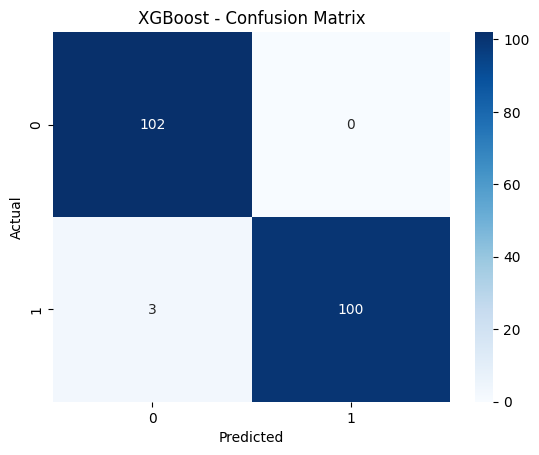


Model Accuracy Summary:
Logistic Regression: 79.51%
SVM: 81.46%
Random Forest: 98.54%
XGBoost: 98.54%


In [2]:
# @title Default title text
# ==============================
# Disease Prediction from Medical Data
# Using SVM, Logistic Regression, Random Forest, XGBoost
# ==============================

# 1. Install required libraries (Colab will need this)
!pip install xgboost scikit-learn pandas matplotlib seaborn --quiet

# 2. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



# 4. Load dataset (update path after uploading to Drive)
file_path = "/content/drive/MyDrive/HeartDisease/heart.csv"  # <-- change to your file name
df = pd.read_csv(file_path)

# 5. View data info
print("Dataset Shape:", df.shape)
print(df.head())

# Optional: Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# 6. Preprocessing
# Replace target_column with your target variable name
target_column = "target"  # <-- change this
X = df.drop(columns=[target_column])
y = df[target_column]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 7. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel="linear", probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# 8. Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Results:")
    print("Accuracy:", round(acc, 4))
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 9. Summary
print("\nModel Accuracy Summary:")
for name, acc in results.items():
    print(f"{name}: {round(acc * 100, 2)}%")


/tmp/ipython-input-1448814078.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_values, palette='viridis')


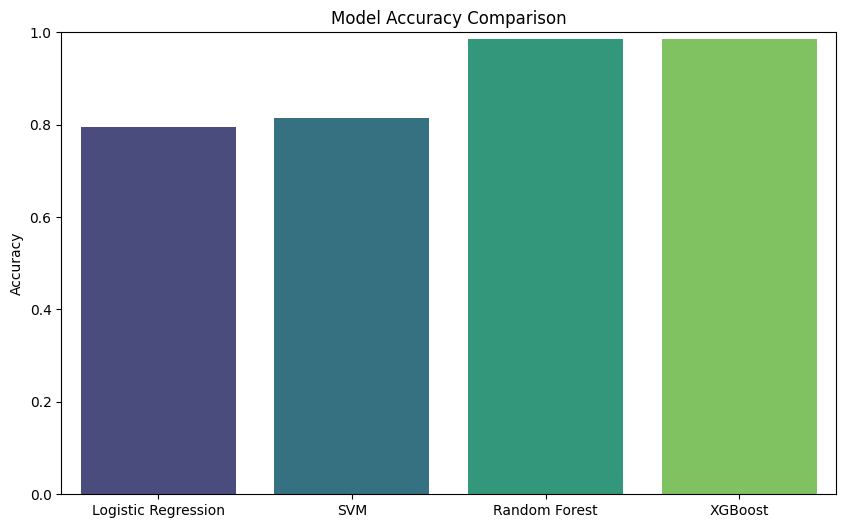

In [3]:
# 10. Visualize Accuracy
model_names = list(results.keys())
accuracy_values = list(results.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_values, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.show()